In [8]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np

In [9]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rcParams['font.size'] = 15

In [10]:
n_snapshots = 101

In [11]:
time = np.empty(n_snapshots)

In [12]:
a2 = np.empty(n_snapshots)

for j in range (0, n_snapshots):
    index = str(j).zfill(3)
    snapshot = f'snapshot_{index}.hdf5'
    
    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    #ler info tempo
    time[j] = round(f['Header'].attrs['Time'], 2)
    
    #ler info disco
    f_disk = f['PartType2']
    
    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    m_disk = np.array(f_disk['Masses'])
    
    #corrigir posição 
    cm_x_disk = sum(m_disk*x_disk)/sum(m_disk)
    cm_y_disk = sum(m_disk*y_disk)/sum(m_disk)

    x_new_disk = x_disk - cm_x_disk
    y_new_disk = y_disk - cm_y_disk
    
    #info para os cálculos
    R = np.sqrt(x_new_disk**2 + y_new_disk**2)
    theta = np.arctan2(y_new_disk, x_new_disk)
    
    out = np.transpose([m_disk, R, theta])
    name = f'info_{index}.txt'
    np.savetxt(name, out, header='m          R         theta', fmt='%1.6e')
    
    #cálculos
    m, R, theta = np.loadtxt(f'info_{index}.txt', usecols=(0,1,2), unpack=True)

    Rmin = 0.0
    Rmax = 20.0
    Nbins = 40
    dR = (Rmax - Rmin)/Nbins
    
    r = np.empty(Nbins)
    ab = np.empty(Nbins)
    a0 = np.empty(Nbins)
    i2 = np.empty(Nbins)

    for i in range(0, Nbins):

        R1 = i * dR
        R2 = R1 + dR
        r[i] = (0.5 * (R1+R2))
        
        over = 1.0 * dR
        
        (R > R1-over) & (R < R2+over)
        cond = np.argwhere((R>R1) & (R<R2)).flatten()

        a = m[cond] * np.cos(2*theta[cond])
        a_quad = sum(a)

        a_ = m[cond] * np.cos(0*theta[cond])
        a0[i] = sum(a_)

        b = m[cond] * np.sin(2*theta[cond])
        b_quad = sum(b)

        ab[i] = a_quad**2+b_quad**2

        i2[i] = np.sqrt(ab[i])/a0[i]
        
    #resultados
    out = np.transpose([r,i2])
    name = f'i2_{index}.txt'
    np.savetxt(name, out, header='r          I2', fmt='%1.6e')
    
    a2[j] = max(i2)
    
out = np.transpose([time,a2])
name = 'a2.txt'
np.savetxt(name, out, header='t          A2', fmt='%1.6e')

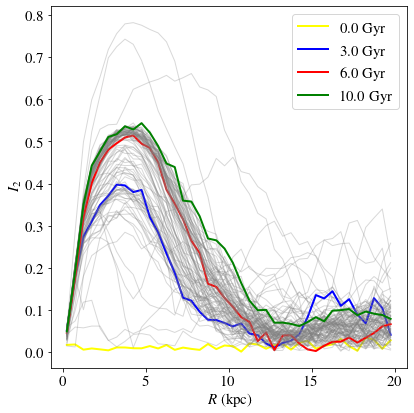

In [13]:
plt.figure(figsize=[6,6])

for j in range (0, n_snapshots):
    index = str(j).zfill(3)
    t = time[j]
    
    doc = f'i2_{index}.txt'
    r, i2 = np.loadtxt(doc, usecols=(0,1), unpack=True)
    
    if t==10.0:
        plt.plot(r, i2, color='green', lw=2, label=f'{t} Gyr')
        
    elif t==6.0:
        plt.plot(r, i2, color='red', lw=2, label=f'{t} Gyr')
        
    elif t==3.0:
        plt.plot(r, i2, color='blue', lw=2, label=f'{t} Gyr')   
        
    elif t==0.0:
        plt.plot(r, i2, color='yellow', lw=2, label=f'{t} Gyr') 
        
    else:
        plt.plot(r, i2, color='grey', lw=1, alpha=0.3) 
    
plt.xlabel('$R$ (kpc)', fontsize=15)
plt.ylabel('$I_2$', fontsize=15)
plt.legend()
plt.tight_layout()

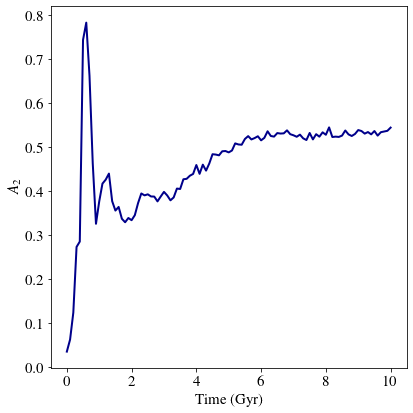

In [14]:
t, a2 = np.loadtxt('a2.txt', usecols=(0,1), unpack=True)

plt.figure(figsize=[6,6])
plt.plot(t, a2, color='darkblue', lw=2)
plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.tight_layout()